# Download Brazil Map from IBGE website

https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/Brasil/BR/

In [1]:
!wget https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/Brasil/BR/BR_Municipios_2020.zip
!wget https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/Brasil/BR/BR_UF_2020.zip

--2023-12-07 11:43:41--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/Brasil/BR/BR_Municipios_2020.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190072527 (181M) [application/zip]
Saving to: ‘BR_Municipios_2020.zip’

BR_Municipios_2020. 100%[===================>] 181.27M  8.23MB/s    in 23s     

2023-12-07 11:44:04 (7.91 MB/s) - ‘BR_Municipios_2020.zip’ saved [190072527/190072527]

--2023-12-07 11:44:04--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/Brasil/BR/BR_UF_2020.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13793582 (13M) [a

In [2]:
import geopandas as gpd

# Load the states dataframe

In [3]:
uf_df = gpd.read_file("BR_UF_2020.zip")

In [4]:
uf_df.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620..."
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


### Plot the states of the south region

<Axes: >

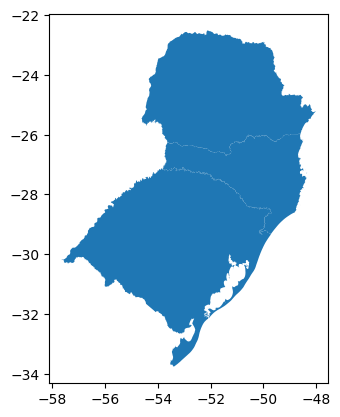

In [5]:
uf_df[uf_df.NM_REGIAO == 'Sul'].plot()

# Load the cities dataframe

In [6]:
city_df = gpd.read_file("BR_Municipios_2020.zip")

In [7]:
city_df.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.19465 -11.82746, -62.19332 -11.8..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-62.53648 -9.73222, -62.52765 -9.736..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.37119 -13.36655, -60.37134 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.00080 -11.29737, -61.00103 -11.3..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.49976 -13.00525, -61.49809 -13.0..."


In [8]:
cities_south_region = city_df.loc[city_df.SIGLA_UF.isin(uf_df.loc[uf_df.NM_REGIAO == 'Sul', 'SIGLA_UF'])]
cities_south_region

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
3912,4100103,Abatiá,PR,228.717,"POLYGON ((-50.22465 -23.22603, -50.22561 -23.2..."
3913,4100202,Adrianópolis,PR,1349.311,"POLYGON ((-48.99969 -24.63712, -48.99927 -24.6..."
3914,4100301,Agudos do Sul,PR,192.261,"POLYGON ((-49.30433 -25.94769, -49.30541 -25.9..."
3915,4100400,Almirante Tamandaré,PR,194.888,"POLYGON ((-49.28261 -25.22827, -49.28076 -25.2..."
3916,4100459,Altamira do Paraná,PR,386.945,"POLYGON ((-52.81511 -24.71726, -52.80995 -24.7..."
...,...,...,...,...,...
5098,4323606,Vista Alegre do Prata,RS,119.327,"POLYGON ((-51.76224 -28.77950, -51.76238 -28.7..."
5099,4323705,Vista Gaúcha,RS,90.022,"POLYGON ((-53.70785 -27.19948, -53.70824 -27.2..."
5100,4323754,Vitória das Missões,RS,258.312,"POLYGON ((-54.54098 -28.27137, -54.53284 -28.2..."
5101,4323770,Westfália,RS,63.665,"POLYGON ((-51.72745 -29.36941, -51.69108 -29.3..."


### Plot cities by territorial area

<Axes: >

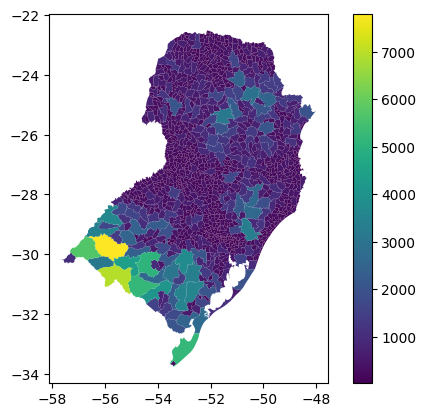

In [9]:
cities_south_region.plot(column='AREA_KM2', legend=True)